# WeatherPy

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | columbia falls
Processing Record 2 of Set 1 | al kharijah
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | porto ferreira
Processing Record 9 of Set 1 | juneau
Processing Record 10 of Set 1 | gallivare
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | muroto-misakicho
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | zaragoza
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | altai
Processing Record 19 of Set 1 | chela
Processing Record 20 of Set 1 | vadso
Processing Record 21 of Set 1 | ri

Processing Record 41 of Set 4 | whakatane
Processing Record 42 of Set 4 | ikryanoye
Processing Record 43 of Set 4 | pacific grove
Processing Record 44 of Set 4 | uturoa
Processing Record 45 of Set 4 | morteros
Processing Record 46 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 47 of Set 4 | crane
Processing Record 48 of Set 4 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 49 of Set 4 | antofagasta
Processing Record 0 of Set 5 | laminusa
Processing Record 1 of Set 5 | gamonal
Processing Record 2 of Set 5 | yuzhno-kurilsk
Processing Record 3 of Set 5 | swakopmund
Processing Record 4 of Set 5 | kirakira
Processing Record 5 of Set 5 | altay
Processing Record 6 of Set 5 | kiffa
Processing Record 7 of Set 5 | svetlyy
Processing Record 8 of Set 5 | wainwright
Processing Record 9 of Set 5 | bedele
Processing Record 10 of Set 5 | salto
Processing Record 11 of Set 5 | tukrah
Processing Record 12 of Set 5 | sandpoint
Processing Record 1

Processing Record 29 of Set 8 | revda
Processing Record 30 of Set 8 | soto la marina
Processing Record 31 of Set 8 | pedro carbo
Processing Record 32 of Set 8 | manatutu
City not found. Skipping...
Processing Record 33 of Set 8 | camargo
Processing Record 34 of Set 8 | barcelos
Processing Record 35 of Set 8 | tvoroyri
Processing Record 36 of Set 8 | kagizman
Processing Record 37 of Set 8 | pathein
Processing Record 38 of Set 8 | broken hill
Processing Record 39 of Set 8 | kayangel
Processing Record 40 of Set 8 | salinas
Processing Record 41 of Set 8 | mesquite
Processing Record 42 of Set 8 | yeraliyev
Processing Record 43 of Set 8 | shalqar
Processing Record 44 of Set 8 | nuku'alofa
Processing Record 45 of Set 8 | trevelin
Processing Record 46 of Set 8 | cidreira
Processing Record 47 of Set 8 | ofunato
Processing Record 48 of Set 8 | yanam
Processing Record 49 of Set 8 | sabang
Processing Record 0 of Set 9 | elmendorf air force base
City not found. Skipping...
Processing Record 1 of Se

Processing Record 17 of Set 12 | tangalle
Processing Record 18 of Set 12 | pariquera acu
Processing Record 19 of Set 12 | basco
Processing Record 20 of Set 12 | mpanda
Processing Record 21 of Set 12 | bereeda
Processing Record 22 of Set 12 | mathba
Processing Record 23 of Set 12 | lebanon
Processing Record 24 of Set 12 | kankaanpaa
Processing Record 25 of Set 12 | hays
Processing Record 26 of Set 12 | rockport
Processing Record 27 of Set 12 | papao
Processing Record 28 of Set 12 | lazaro cardenas
Processing Record 29 of Set 12 | portmore
Processing Record 30 of Set 12 | annigeri
Processing Record 31 of Set 12 | bulungu
Processing Record 32 of Set 12 | wamba
Processing Record 33 of Set 12 | ocos
Processing Record 34 of Set 12 | qamdo
Processing Record 35 of Set 12 | rongelap
Processing Record 36 of Set 12 | pingliang
Processing Record 37 of Set 12 | terenozek
Processing Record 38 of Set 12 | fada
Processing Record 39 of Set 12 | ceeldheer
Processing Record 40 of Set 12 | alta
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,columbia falls,48.3725,-114.1815,21.82,43,20,5.14,US,1689115655
1,al kharijah,25.4514,30.5464,28.88,25,1,3.28,EG,1689115565
2,wailua homesteads,22.0669,-159.3780,27.44,81,100,8.75,US,1689115655
3,hithadhoo,-0.6000,73.0833,27.39,71,74,1.61,MV,1689115656
4,hawaiian paradise park,19.5933,-154.9731,27.80,72,20,3.60,US,1689115656


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,columbia falls,48.3725,-114.1815,21.82,43,20,5.14,US,1689115655
1,al kharijah,25.4514,30.5464,28.88,25,1,3.28,EG,1689115565
2,wailua homesteads,22.0669,-159.3780,27.44,81,100,8.75,US,1689115655
3,hithadhoo,-0.6000,73.0833,27.39,71,74,1.61,MV,1689115656
4,hawaiian paradise park,19.5933,-154.9731,27.80,72,20,3.60,US,1689115656


### Create the Scatter Plots Requested

### Latitude Vs. Temperature

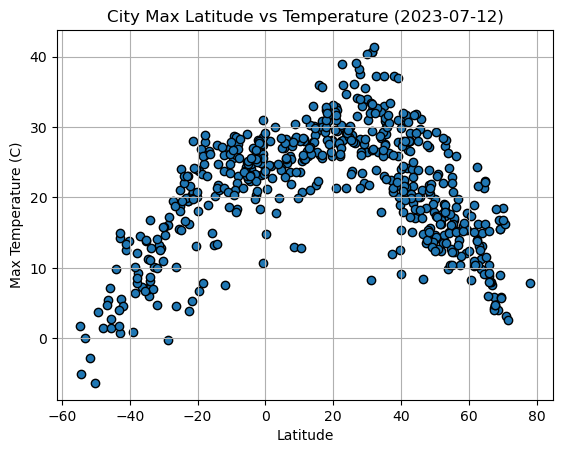

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, edgecolors="black")

# Incorporate the other graph properties
today = time.strftime("%Y-%m-%d")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs Temperature ({today})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude vs Humidity

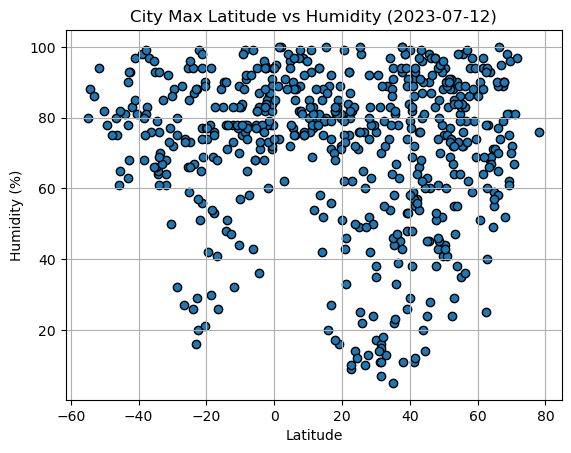

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, edgecolors="black")

# Incorporate the other graph properties
today = time.strftime("%Y-%m-%d")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Max Latitude vs Humidity ({today})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude vs Cloudiness

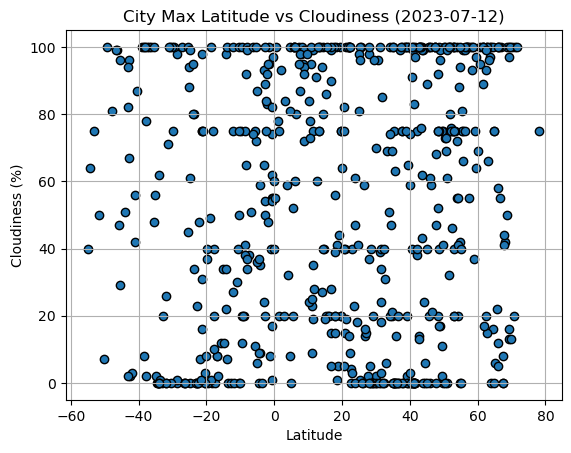

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, edgecolors="black")

# Incorporate the other graph properties
today = time.strftime("%Y-%m-%d")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Max Latitude vs Cloudiness ({today})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs Wind Speed

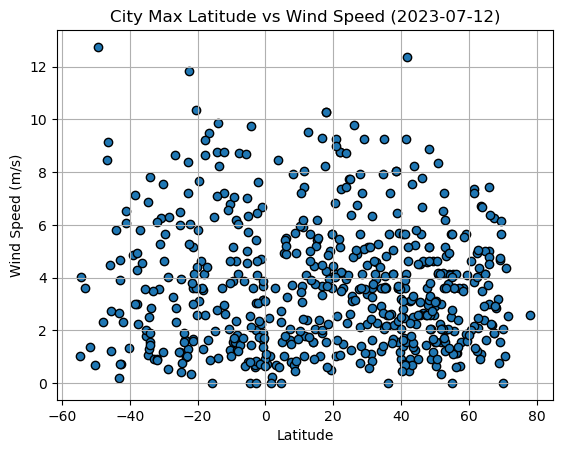

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, edgecolors="black")


# Incorporate the other graph properties
today = time.strftime("%Y-%m-%d")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Max Latitude vs Wind Speed ({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-", label=("y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))))
    plt.legend(loc="best", handletextpad=0, handlelength=0, labelcolor="red", fontsize=16)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,columbia falls,48.3725,-114.1815,21.82,43,20,5.14,US,1689115655
1,al kharijah,25.4514,30.5464,28.88,25,1,3.28,EG,1689115565
2,wailua homesteads,22.0669,-159.3780,27.44,81,100,8.75,US,1689115655
4,hawaiian paradise park,19.5933,-154.9731,27.80,72,20,3.60,US,1689115656
5,bethel,41.3712,-73.4140,30.83,57,0,4.12,US,1689115388


In [14]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hithadhoo,-0.6000,73.0833,27.39,71,74,1.61,MV,1689115656
6,porto ferreira,-21.8539,-47.4792,20.25,51,7,0.34,BR,1689115657
9,waitangi,-43.9535,-176.5597,9.90,81,51,5.81,NZ,1689115658
11,bredasdorp,-34.5322,20.0403,7.09,79,0,1.07,ZA,1689115659
18,richards bay,-28.7830,32.0377,16.02,75,98,4.03,ZA,1689115471


### Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.41138530585200195


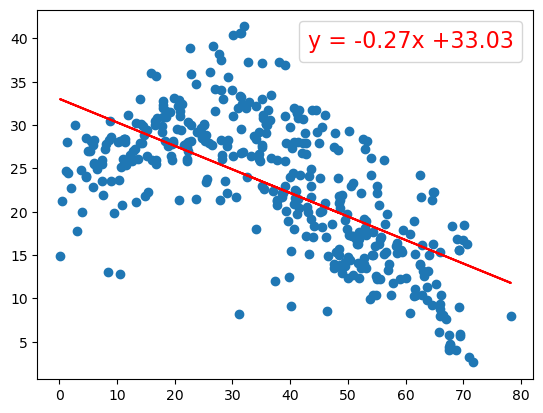

In [15]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression(x_values, y_values)

The r-value is: 0.6785291391474758


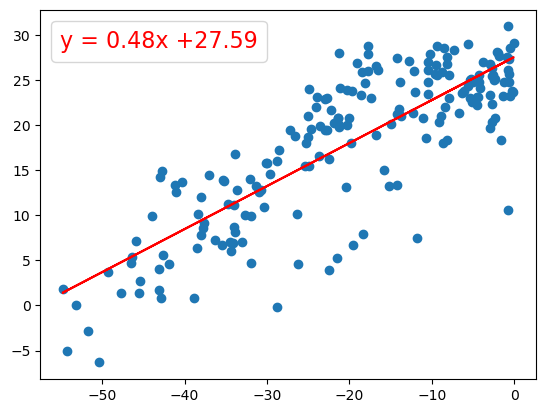

In [16]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression(x_values, y_values)

**Discussion about the linear relationship:** There is a moderate correlation between latitude and temperature, with temperatures increasing towards the equator and decreasing towards the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00021714252561875536


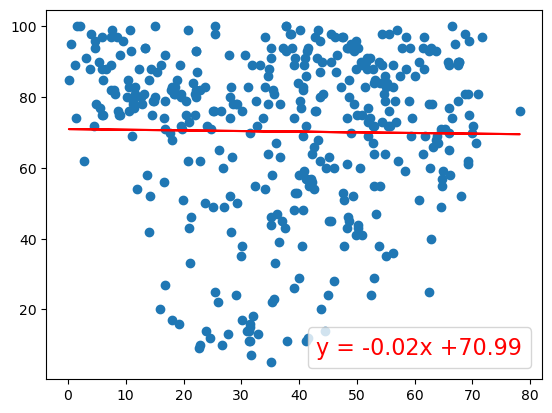

In [17]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression(x_values, y_values)

The r-value is: 5.079992530482637e-05


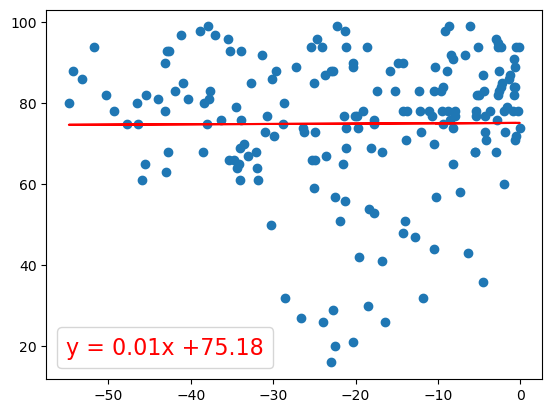

In [18]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression(x_values, y_values)

**Discussion about the linear relationship:** There is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003173773047455753


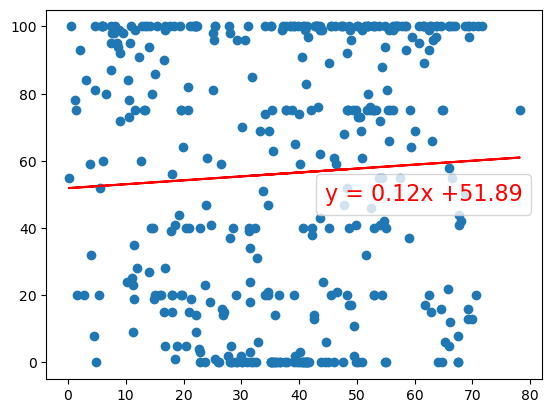

<Figure size 640x480 with 0 Axes>

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression(x_values, y_values)
plt.savefig("output_data/Fig8.png")

The r-value is: 6.964503833249693e-05


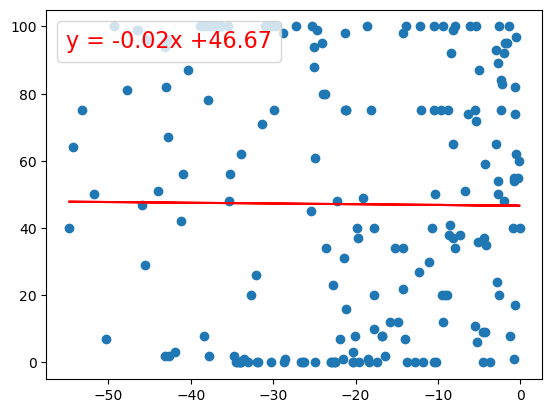

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression(x_values, y_values)

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006062935725962284


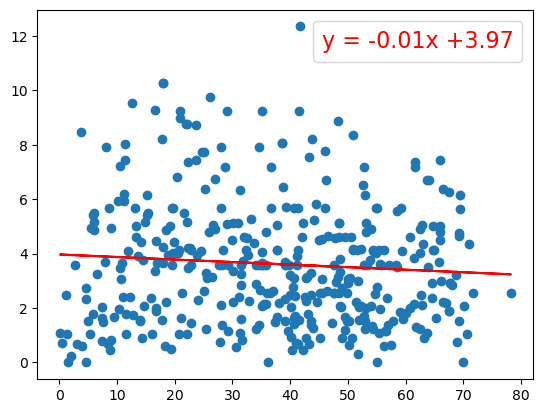

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression(x_values, y_values)

The r-value is: 0.001686556686288731


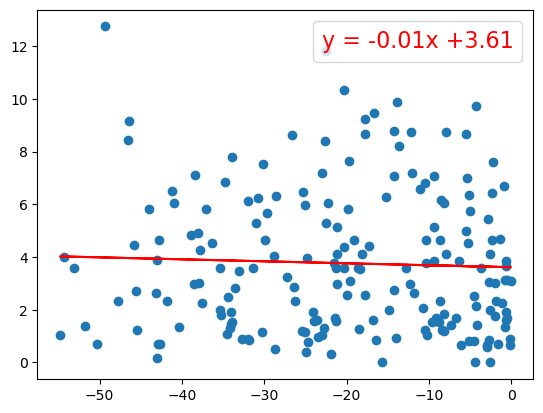

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression(x_values, y_values)

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed.